In [1]:
# Loading libraries
library(forecast)
library(xts)

library(TTR)
library(tseries)

# LOADING DATASET
require(quantmod)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: quantmod
Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
G <- new.env()
getSymbols("GOOG", env = G, src = "yahoo",
          from = as.Date("2013-04-09"), to = as.Date("2018-04-10"),return.class='ts')


‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "GOOG"

ERROR: Error in plot(g): object 'g' not found


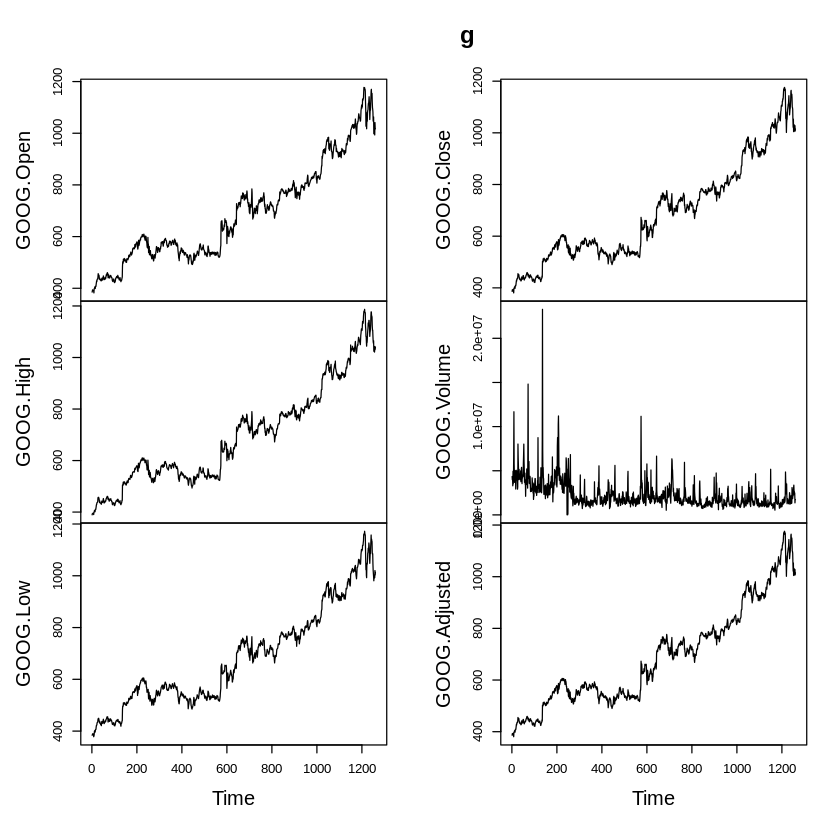

In [4]:
# Plot original series
g<-G$GOOG
plot(g)

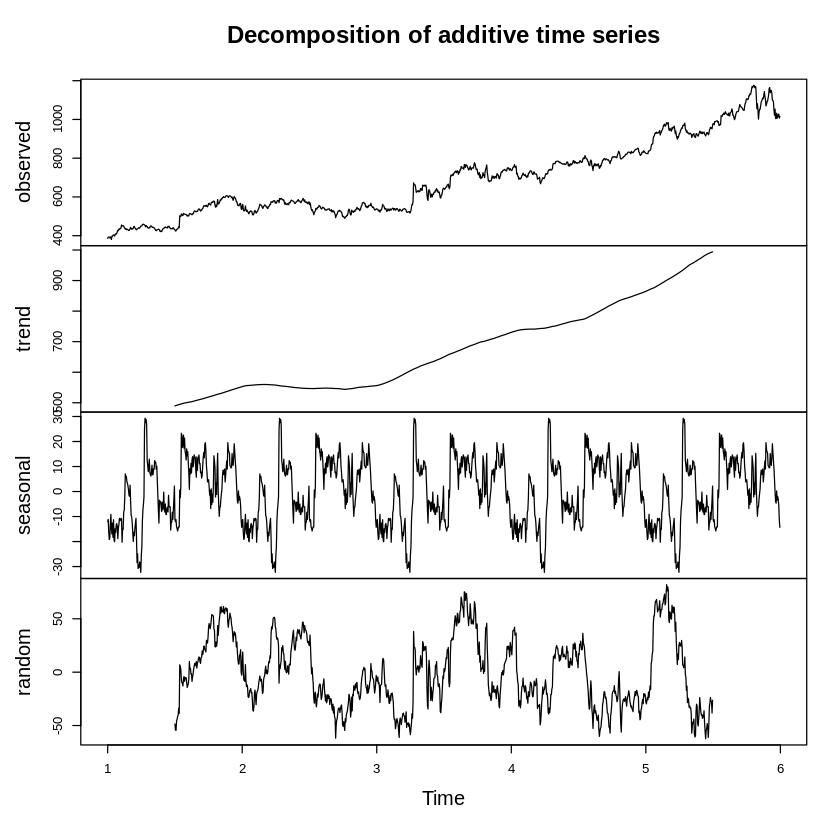

In [5]:
plot(decompose(ts(g[,"GOOG.Adjusted"],frequency = 252)))


In [6]:
library(tseries)
g.adj.train<-g[2:1250,c(5)]
g.adj.test<-g[1251:1260,c(5)]

vol.train<-g[1:1249,6]
vol.test<-g[1251:1260,6]

model1<-auto.arima(g.adj.train)
model2<-auto.arima(g.adj.train,xreg = vol.train)



 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.163939e+12     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1  1.935e+04
     1    2  1.895e+04  2.05e-02  2.64e-01  2.3e-13  5.1e+03  1.0e+00  6.73e+02
     2    4  1.893e+04  1.09e-03  1.05e-03  1.1e-14  5.9e+00  5.0e-02  3.43e+00
     3    6  1.890e+04  1.75e-03  1.73e-03  2.1e-14  2.0e+00  1.0e-01  2.52e-02
     4    8  1.889e+04  2.85e-04  2.84e-04  4.2e-15  1.4e+01  2.0e-02  9.13e-03
     5   10  1.888e+04  5.07e-04  5.07e-04  8.4e-15  2.6e+00  4.0e-02  3.89e-03
     6   11  1.888e+04 -5.30e+05  7.67e-04  1.7e-14  3.8e+00  8.0e-02  2.07e-03

 ***** FALSE CONVERGENCE *****

 FUNCTION     1.888006e+04   RELDX        1.680e-14
 FUNC. EVALS      11         GRAD. EVALS       6
 PRELDF       7.669e-04      NPRELDF      2.073e-03

     I      FINAL X(I)   

Warning message in garch(g.adj.train):
“singular information”

In [21]:
str(g.adj.train)

 num [1:1249] 3982800 4083700 3294500 4938000 3506500 ...


In [22]:
model3<-garch(g.adj.train[1:1000])


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.452163e+12     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1  1.558e+04
     1    2  1.524e+04  2.15e-02  2.68e-01  2.0e-13  4.2e+03  1.0e+00  5.59e+02
     2    4  1.523e+04  1.08e-03  1.04e-03  9.5e-15  5.8e+00  5.0e-02  2.73e+00
     3    6  1.520e+04  1.73e-03  1.71e-03  1.9e-14  2.0e+00  1.0e-01  1.98e-02
     4    8  1.520e+04  2.82e-04  2.81e-04  3.7e-15  1.4e+01  2.0e-02  6.94e-03
     5   10  1.519e+04  5.01e-04  5.00e-04  7.4e-15  2.6e+00  4.0e-02  3.00e-03
     6   11  1.519e+04 -6.58e+05  7.53e-04  1.5e-14  3.8e+00  8.0e-02  1.62e-03

 ***** FALSE CONVERGENCE *****

 FUNCTION     1.518924e+04   RELDX        1.485e-14
 FUNC. EVALS      11         GRAD. EVALS       6
 PRELDF       7.525e-04      NPRELDF      1.620e-03

     I      FINAL X(I)   

Warning message in garch(g.adj.train[1:1000]):
“singular information”

In [18]:
#library(rugarch)

In [8]:
summary(model1)

Series: g.adj.train 
ARIMA(1,1,3) 

Coefficients:
         ar1      ma1      ma2     ma3
      0.7087  -1.1395  -0.0050  0.1638
s.e.  0.0869   0.0944   0.0555  0.0545

sigma^2 estimated as 1.115e+12:  log likelihood=-19079.52
AIC=38169.04   AICc=38169.09   BIC=38194.69

Training set error measures:
                    ME    RMSE    MAE       MPE     MAPE      MASE
Training set -32735.42 1053976 591689 -78.57784 93.51857 0.9086246
                      ACF1
Training set -0.0001109757


In [9]:
summary(model2)

Series: g.adj.train 
Regression with ARIMA(1,1,3) errors 

Coefficients:
         ar1      ma1      ma2     ma3       xreg
      0.7084  -1.1379  -0.0053  0.1630  -1526.720
s.e.  0.0885   0.0959   0.0559  0.0549   1723.112

sigma^2 estimated as 1.116e+12:  log likelihood=-19079.12
AIC=38170.24   AICc=38170.31   BIC=38201.02

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE
Training set -19491.8 1053645 588276.8 -78.03184 93.46602 0.9033847
                     ACF1
Training set 0.0005507875


In [10]:
summary(model3)


Call:
garch(x = g.adj.train)

Model:
GARCH(1,1)

Residuals:
     Min       1Q   Median       3Q      Max 
0.002446 0.600827 0.733287 0.916355 3.406315 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)
a0 2.164e+12          NA       NA       NA
a1 9.535e-01          NA       NA       NA
b1 3.069e-02          NA       NA       NA

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 4849.3, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 15.468, df = 1, p-value = 8.393e-05


In [12]:
f1<-forecast(model1, h=10)
f2<-forecast(model2, h=10, xreg = vol.test)
#f3<-forecast(model3, h=10)

In [13]:
accuracy(f1, g.adj.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-32735.42,1053976.3,591689.0,-78.57784,93.51857,0.9086246,-0.0001109757
Test set,534340.06,782442.1,667170.5,16.57151,25.72894,1.0245375,NA


In [14]:
accuracy(f2, g.adj.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-19491.8,1053645.3,588276.8,-78.03184,93.46602,0.9033847,0.0005507875
Test set,426745.9,714283.1,630174.5,11.74723,25.26633,0.9677247,NA


In [17]:
f3<-forecast(model3)

ERROR: Error in is.constant(y): (list) object cannot be coerced to type 'double'


In [16]:
model3


Call:
garch(x = g.adj.train)

Coefficient(s):
       a0         a1         b1  
2.164e+12  9.535e-01  3.069e-02  
